## PCA and Linear Regression
 
Principle component analysis will be used to narrow down the scope of our focus in the different forms of analysis being utilized. By determining which variables contribute the most to the variability in the data set, specific variables can be focused on. There are three main groups of variables: location variables (latitude, longitude, region), time/date variables (year, time, time_lag, date), and variables related to the seismic event itself such as depth, magnitude and b-values. Using PCA to focus in on which of these variables connect the data together the most helped determine the predictor variables in our project. 

For the linear regression in this project, the response variable being predicted out of the three possible variables was magnitude. The magnitude was predicted using depth, year, time, b-value, latitude, and longitude after unnecessary variables were eliminated  after the PCA was completed. The Multiple linear regression will be completed using the overall USGS data set and the Flinn-Engdahl regions that have the top ten highest magnitude events. 

Group 11 is using a combination of Bill, Elysa, and Jessica's code to complete the analysis. 
The PCA will be done to see how variables interact within the Flinn-Engdahl regions and seeing if it is possible to do linear regression within these regions. B-values and time-lag variables from Jessica's new csv file that combines the region and b-values into one data set will be used to save time. PCA will be conducted and then a simple multiple linear regression will be performed.

# Data Ingestion and Cleanup

The following cells will be used to ingest the data needed for the PCA and linear regression and reformat and reorganize them into dataframes that will be used in my analysis. Time_lag, b-values, and other time variables that were not included in the intial PCA will be included in this one to see how variables interact. 

In [17]:
#Enables the use of functions from other R notebooks 
source('initialize_data.R', echo = FALSE)

In [18]:
#Installs necessary packages 
suppressWarnings(suppressMessages(load_libraries()))

[1] "libraries loaded successfully"


In [19]:
#Reads in new data csv files 
tpts <- read.csv(file="data.csv", header=TRUE, sep=",")

In [20]:
#Checks to make sure data was loaded properly 
head(tpts)

X,newname,depth,mag,time,id,updated,latitude,longitude,bvalue,error,time_lag
1,10,33.0,5.1,1999-02-14 17:17:27,usp00092tz,2014-11-07 01:07:01,21.581,-106.681,0.6204207,0.66570086,NA
2,10,33.0,4.5,1999-03-16 06:14:07,usp00094kr,2014-11-07 01:07:14,22.002,-107.375,0.6204207,0.66570086,1999-02-14 17:17:27
3,10,10.0,4.5,1999-01-13 07:38:50,usp0009114,2014-11-07 01:06:48,22.690,-107.988,0.6204207,0.66570086,1999-03-16 06:14:07
4,10,10.0,5.3,1999-03-12 07:07:40,usp00094by,2016-11-09 22:04:11,22.219,-107.368,0.6204207,0.66570086,1999-01-13 07:38:50
5,10,33.0,5.2,1999-01-10 20:36:06,usp00090x3,2016-11-09 21:38:36,22.939,-108.020,0.6204207,0.66570086,1999-03-12 07:07:40
6,100,129.1,4.3,1999-04-15 14:05:21,usp00096bk,2014-11-07 01:07:28,-19.295,-69.268,0.3347563,0.04778564,NA


In [21]:
#Bill
#Explicit location of main project data
path <- "~/jupyter/cs2019_Group11/GroupProducts/data" 

#create df from main project data
df <- loadFiles(path) %>%
    reqCols %>%
    parseDt('time')

Files in "~/jupyter/cs2019_Group11/GroupProducts/data" loaded.
Subset Completed.
Parsed column: time.


In [22]:
#Elysa
#Reduce data down to time columns, I was unable to convert the time column from the CSV file to a POSIXct
df = df[ -c(1:5, 7) ]
head(df)

id,time_Date,time_Time,time_Year
usp0009awp,1999-07-01,18:29:27,1999
uw10474128,1999-07-01,17:10:51,1999
usp0009awk,1999-07-01,16:42:41,1999
usp0009awh,1999-07-01,15:50:11,1999
usp0009awf,1999-07-01,14:52:19,1999
usp0009awe,1999-07-01,14:52:12,1999


In [23]:
#Elysa
#Final Cleaning of data for PCA
#Remove uneeded columns and merges time data frame values 
tpts_df = as.data.frame(tpts)
tpts_df$X = NULL
tpts_df$time = NULL
tpts_df[is.na(tpts_df)] = 0
bvalue_df <- merge(tpts_df, df, by = 'id')
head(bvalue_df)

id,newname,depth,mag,updated,latitude,longitude,bvalue,error,time_lag,time_Date,time_Time,time_Year
ak00210oudoo,565,87.5,2.5,2019-02-12 16:26:52,63.1622,-149.6963,0.6433992,0.48815573,2002-03-25 06:03:03,2002-01-22,12:51:05,2002
ak0021221pwa,18,10.0,3.3,2019-02-12 16:27:01,54.3998,-160.7571,0.3158505,0.11982004,2002-03-16 04:07:20,2002-01-23,19:15:41,2002
ak002129q4mn,20,44.9,2.5,2019-02-12 16:26:57,59.9429,-149.7878,0.6113635,0.02304888,2002-08-28 11:33:20,2002-01-23,08:05:02,2002
ak00212ah915,565,7.7,3.1,2019-02-12 16:26:58,63.2605,-151.3179,0.6433992,0.48815573,2002-11-05 05:16:11,2002-01-23,09:31:57,2002
ak00213vjuuf,18,16.6,3.1,2019-02-12 16:27:06,55.4264,-158.4416,0.3158505,0.11982004,2002-06-11 04:22:38,2002-01-24,05:17:53,2002
ak00213y0rgf,37,13.2,3.7,2019-02-12 16:27:07,60.2080,-139.4049,0.6300175,0.05132107,2002-09-01 19:07:24,2002-01-24,09:32:33,2002


In [24]:
#Elysa 
#Checking to see if merge was done correctly 
dim(bvalue_df)

[1] 506244     13

In [25]:
#Bill + Elysa 
#finding top ten Flinn-Engdahl regions by max magnitude occuring in that region

#grouping and summarising by max mag
tpts_df_mm = bvalue_df %>% group_by(newname) %>% summarise(max(mag))

#changing column name to max_mag for easier use
colnames(tpts_df_mm) <- c('newname', 'max_mag')

#ordering by descending max_mag
tpts_df_mm = arrange(tpts_df_mm, desc(max_mag))

#displaying top then regions and their max_mags
top_ten_mag_regions = head(tpts_df_mm, 10)
top_ten_mag_regions

newname,max_mag
197,9.1
570,9.1
54,8.8
593,8.6
65,8.4
191,8.4
171,8.3
553,8.3
669,8.3
60,8.2


In [26]:
#Elysa
#Finds the unique values of the highest magnitude regions in the dataframe 
regions = unique(top_ten_mag_regions$newname)
regions

[1] 197 570  54 593  65 191 171 553 669  60

# PCA Testing 

After data cleanup is done and the top ten regions with the highest magnitude events were found. Now dataframes and PCAs can be made for each of the top ten regions to narrow down the scope of the analysis. Dataframes will be created using a for loop and then for each individual region a PCA will be performed. Visualizations for each PCA will then be created using a for loop. A PCA for the overall data set, not just the top ten regions will be performed as well for comparative purposes. 

In [27]:
#Elysa
#Testing to see if I can create dataframes basing on unique regions using a for loop to save time 
#After the dataframes are seperated by region then I can create a PCA for each one 
for (i in c(1,2,3,4,5,6,7,8,9,10)) {
  assign(paste0("df_", i), subset(bvalue_df, newname == regions[i],select=c(latitude,longitude,depth,mag,time_Year,time_Time)) )
}

dflist = list(df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_9,df_10)

for (i in 1:length(dflist)) {
  assign(paste0("PCA_", i),prcomp(dflist[[i]], center = TRUE,scale. = TRUE ))
}

In [28]:
#Elysa
#Testing to see if the PCA was created for all ten values 
summary(PCA_10)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6
Standard deviation     1.3535 1.0716 1.0293 0.9786 0.8969 0.44512
Proportion of Variance 0.3053 0.1914 0.1766 0.1596 0.1341 0.03302
Cumulative Proportion  0.3053 0.4967 0.6733 0.8329 0.9670 1.00000

In [29]:
#Elysa
#Created a base function to create PCA based on region
#Region can be changed to continent or whatever variable you'd like to use 
PCAFunc = function(df){
    regions = unique(df$newname)
regions
for (i in c(1,2,3,4,5,6,7,8,9,10)) {
  assign(paste0("df_", i), subset(df, newname == regions[i],select=c(latitude,longitude,depth,mag,time_Year,time_Time)) )
}

dflist = list(df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_9,df_10)

for (i in 1:length(dflist)) {
  assign(paste0("PCA_", i),prcomp(dflist[[i]], center = TRUE ))
}
    }

In [30]:
#Elysa
#testing to see if my PCA function worked 
PCAFunc(bvalue_df)
summary(PCA_10)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6
Standard deviation     1.3535 1.0716 1.0293 0.9786 0.8969 0.44512
Proportion of Variance 0.3053 0.1914 0.1766 0.1596 0.1341 0.03302
Cumulative Proportion  0.3053 0.4967 0.6733 0.8329 0.9670 1.00000

In [31]:
#Elysa
#importing libraries to visualize the PCA
library(devtools)
options(unzip = "internal")
devtools::install_github("vqv/ggbiplot")

from URL https://api.github.com/repos/vqv/ggbiplot/zipball/master
Installing ggbiplot
Warning message in system(paste(TAR, "--version >", tf, "2>&1")):
“error in running command”Warning message in system(cmd):
“error in running command”Warning message in utils::untar(src, exdir = target, compressed = "gzip"):
“‘/bin/gtar -xf '/tmp/RtmprUpk7a/ggplot2_3.2.0.tar.gz' -C '/tmp/RtmprUpk7a/devtools796cdf4adb'’ returned error code 127”Warning message in system(paste(TAR, "--version >", tf, "2>&1")):
“error in running command”Installation failed: error in running command
'/opt/conda/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/RtmprUpk7a/devtools7913de52fe/vqv-ggbiplot-7325e88'  \
  --library='/opt/conda/lib/R/library' --install-tests 



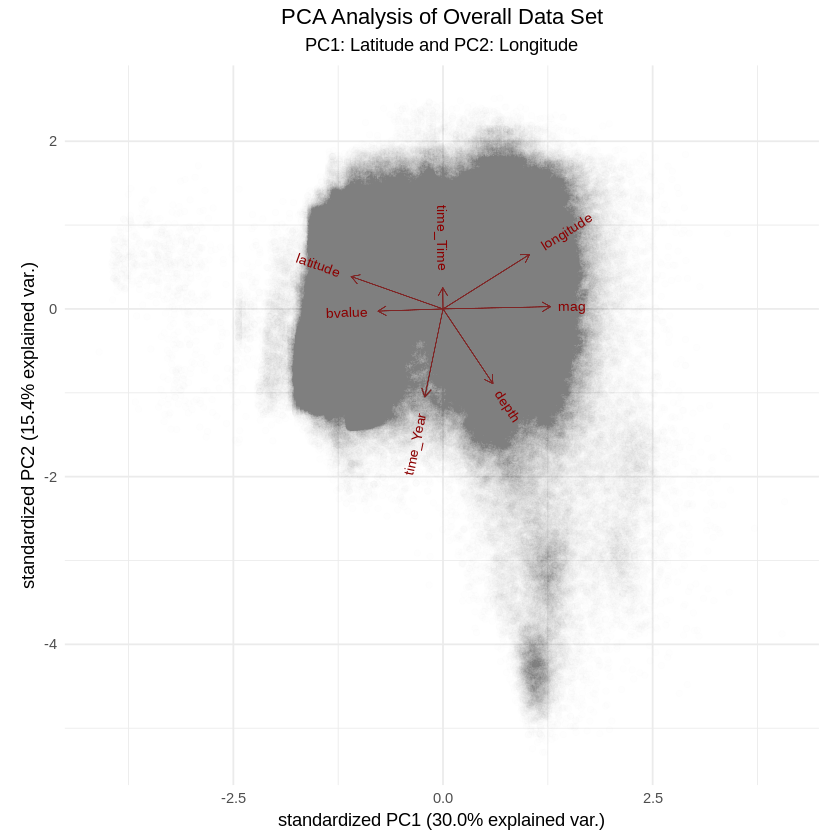

In [33]:
#Elysa
#importing the library for plotting PCA 
library(ggbiplot)
#Doing a PCA of all datapoints and variables
overall_df = subset(bvalue_df, select = c(latitude,longitude,bvalue,depth,mag,time_Year,time_Time))
overall.pca <- prcomp(overall_df, center = TRUE,scale. = TRUE)
p = ggbiplot(overall.pca,alpha = 0.005)
p+labs(title="PCA Analysis of Overall Data Set",subtitle="PC1: Latitude and PC2: Longitude")+
theme_minimal()+theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5))

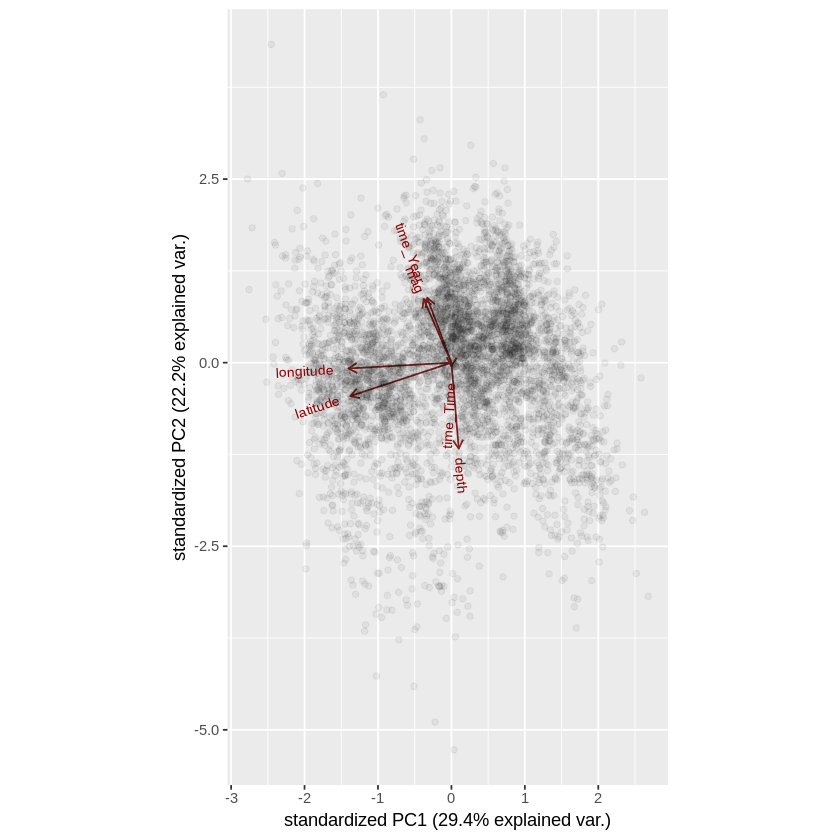

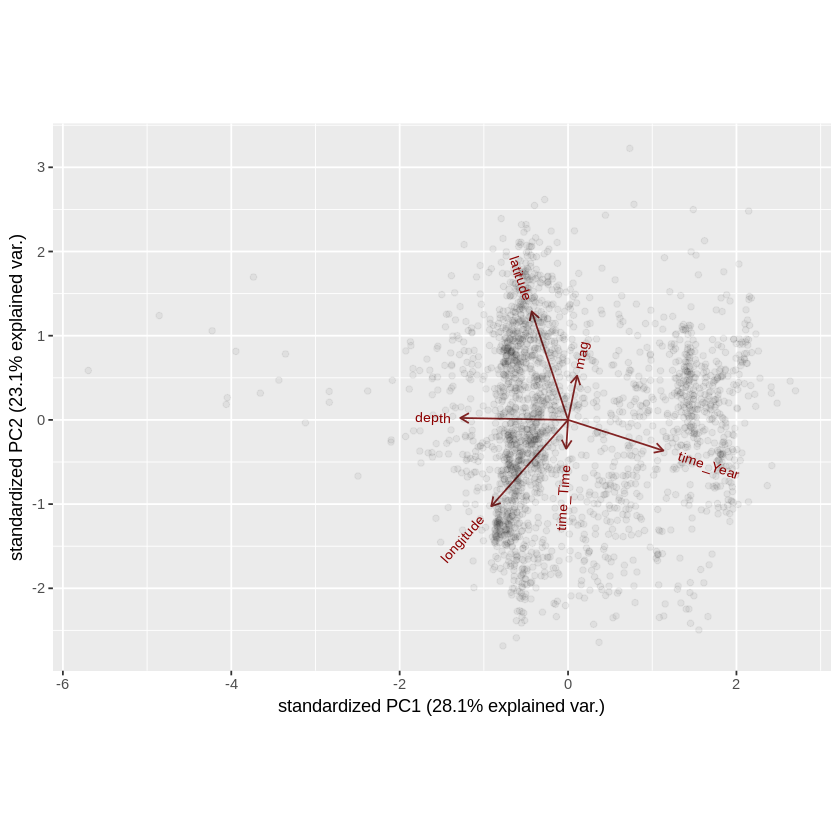

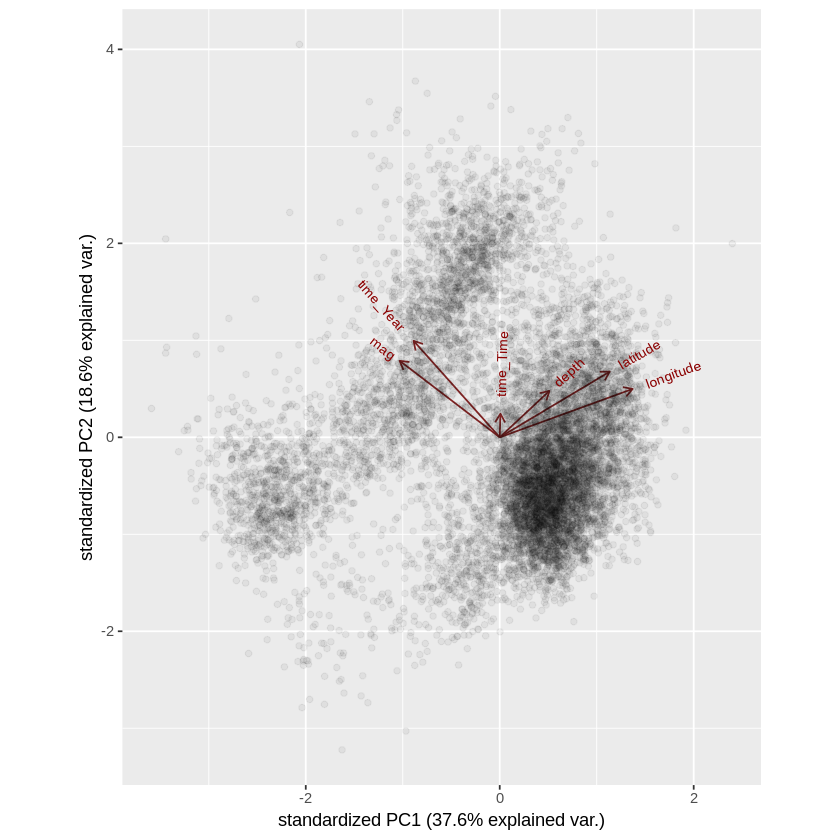

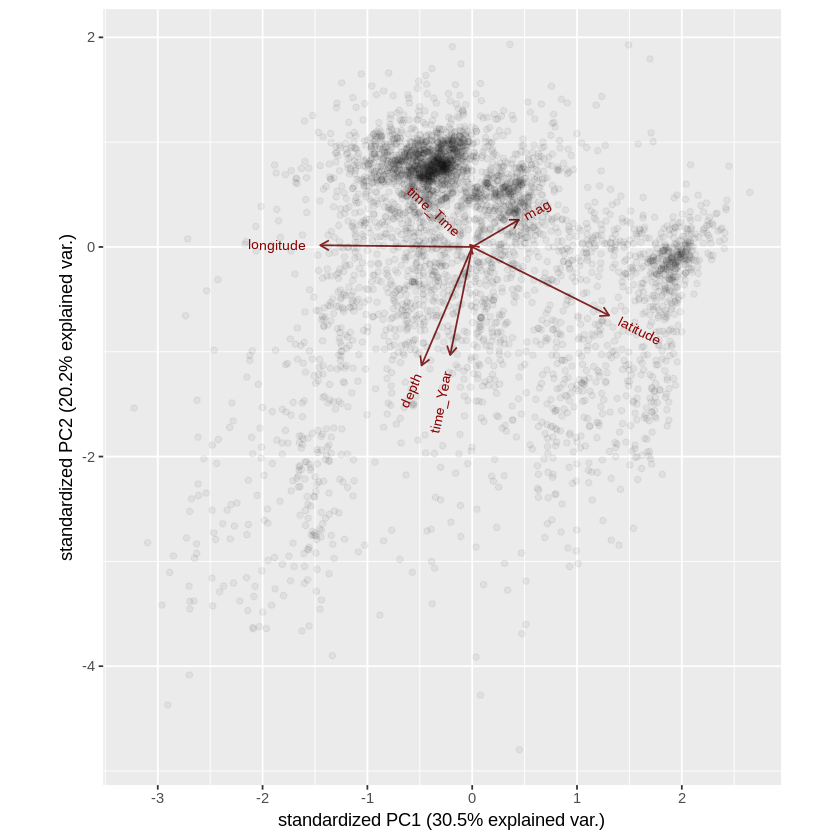

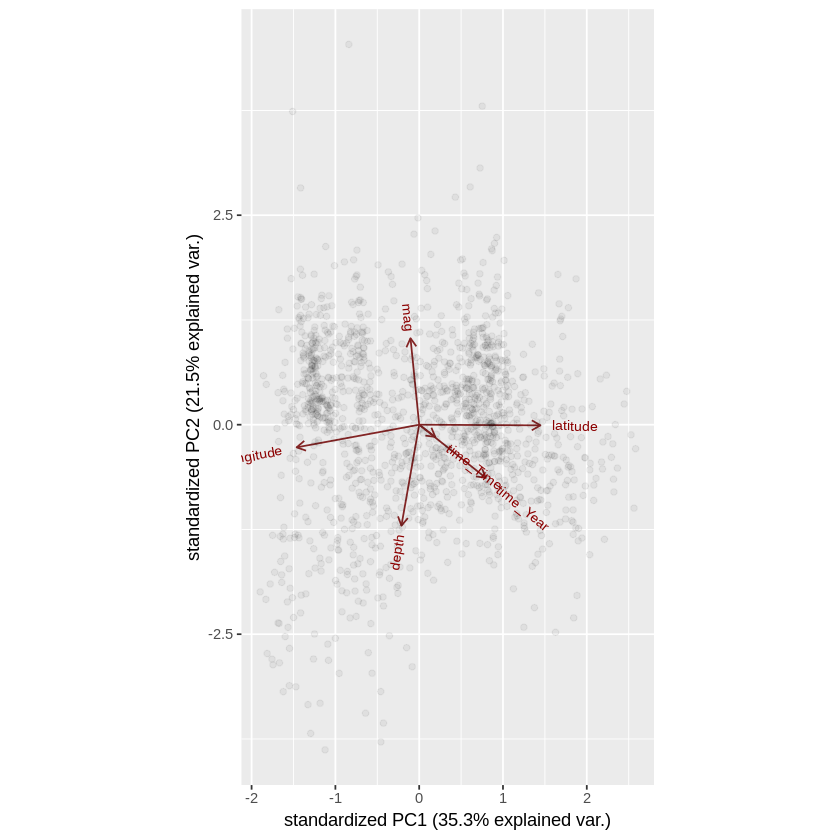

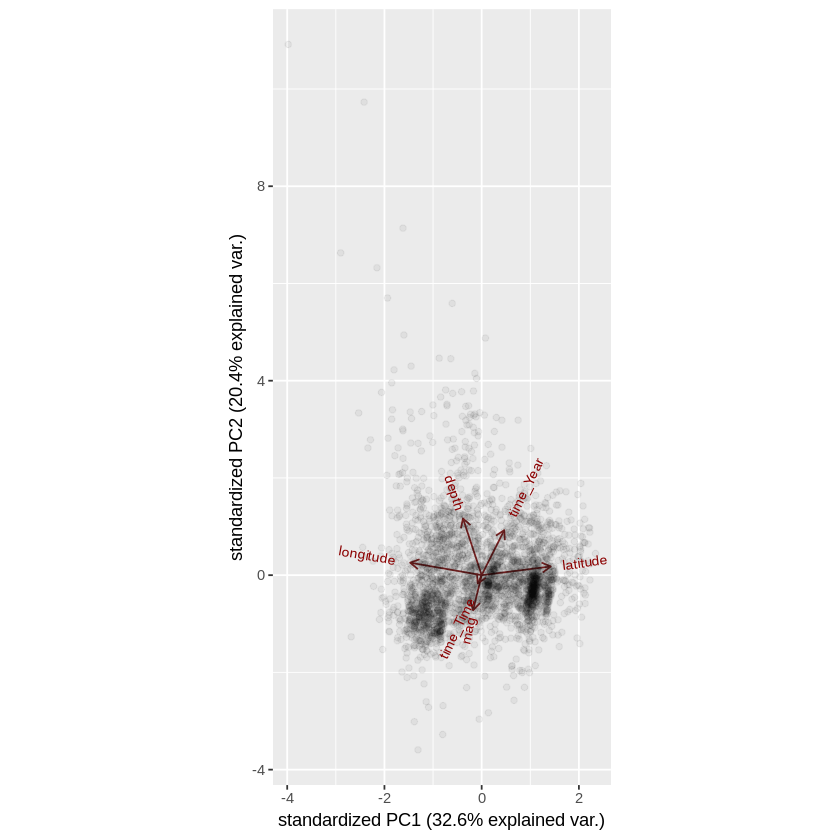

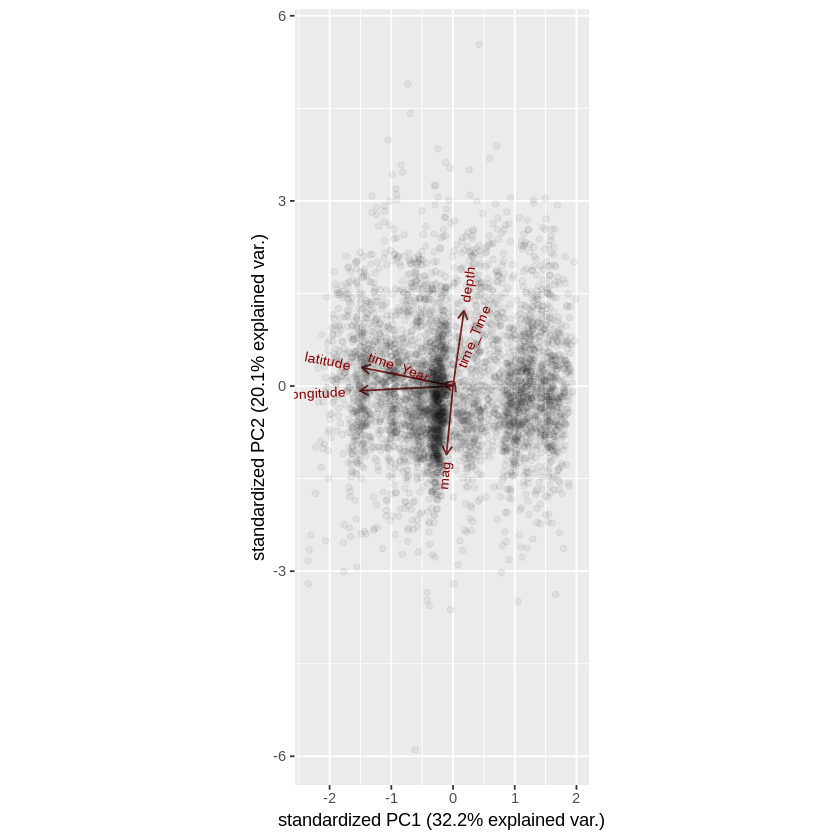

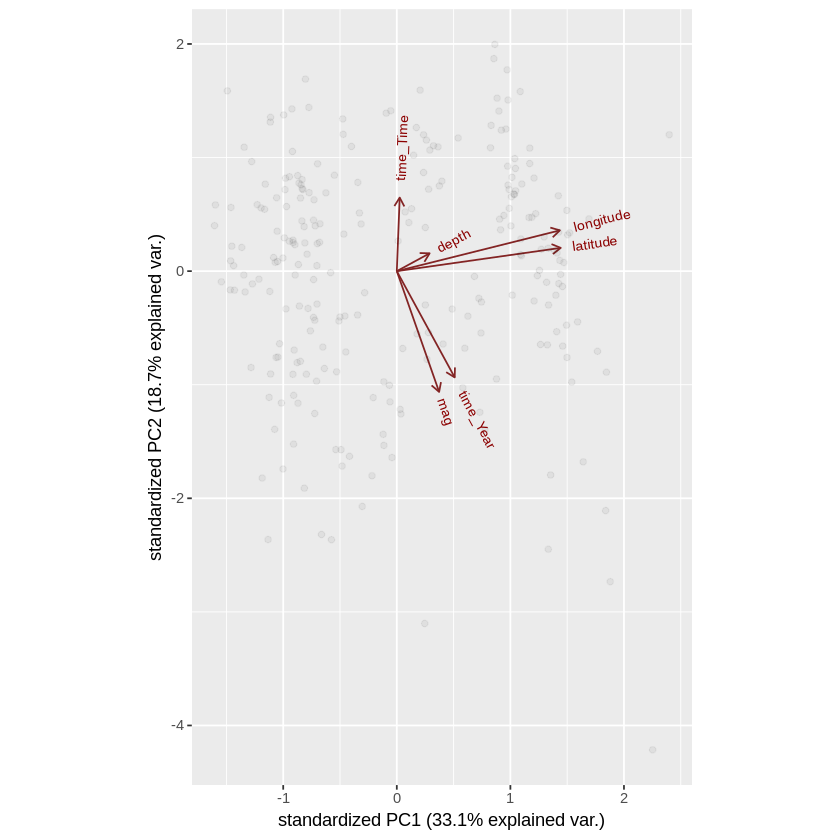

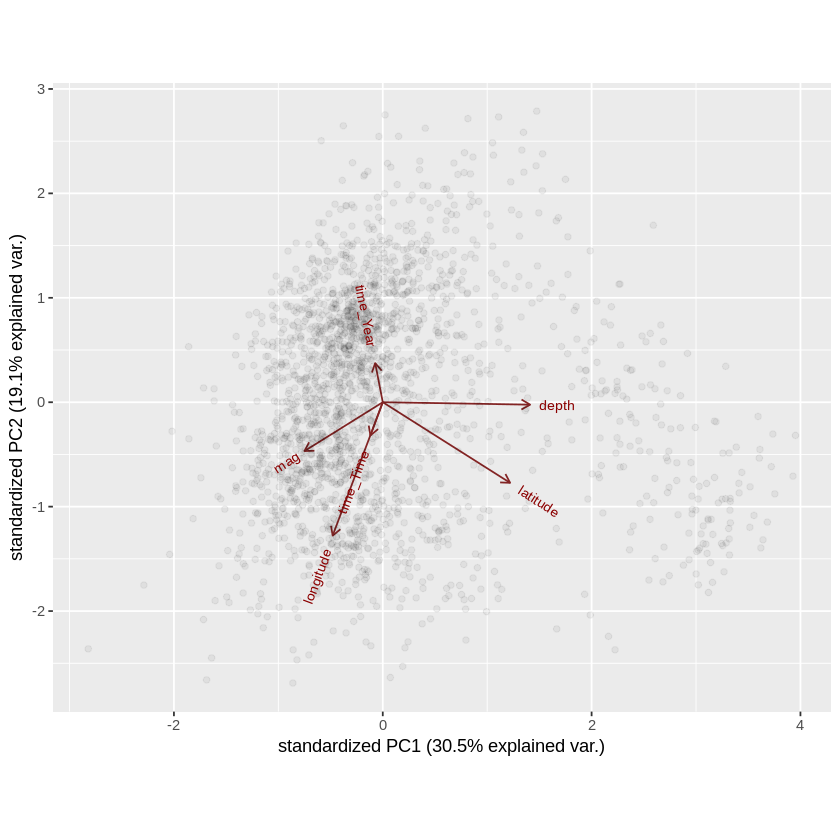

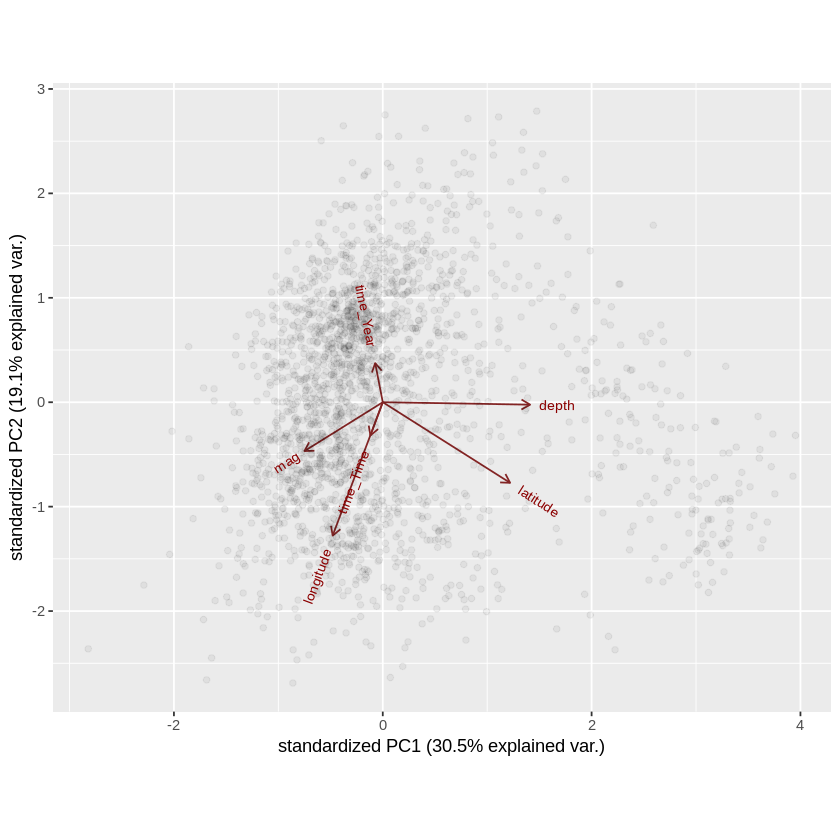

In [34]:
#Elysa
#Created a list of PCAs for each top ten highest magnitude region to iterate through
pcalist = list(PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10)

for (i in 1:length(pcalist)) {
  print(ggbiplot(pcalist[[i]],alpha = 0.05))
}

#PC1 is Depth and PC2 is Mag

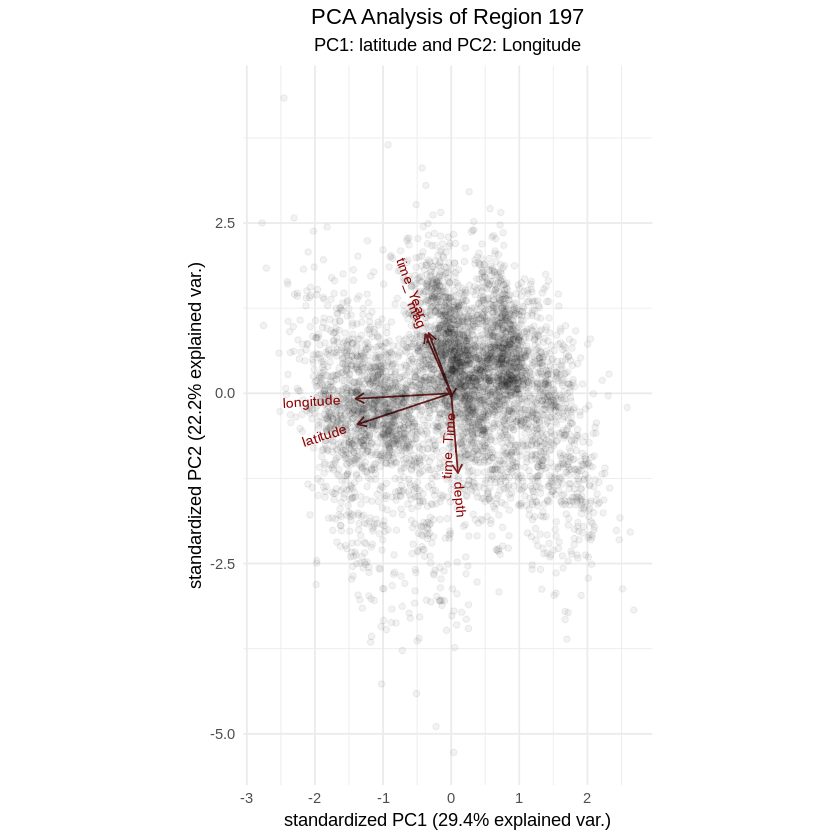

In [21]:
#Elysa 
#Created a PCA of the region with the highest magnitude event 
p2 = ggbiplot(PCA_1,alpha = 0.05)
p2+labs(title="PCA Analysis of Region 197",subtitle="PC1: latitude and PC2: Longitude")+theme_minimal()+
theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5))

With the addition of the time_time variable the explanation of variances changing from region to region can be seen. 
B-values could not be included in the top ten magnitude region PCA due to each region having the same b-value per event making the variance equal to 0. There were troubles converting the time_lag variable from character to numeric that made it difficult to include in the PCA. 
Overall the PCA shows that latitude and longitude explain most of the variances in the data set and that the spread of variances differs from region to region and looks much different than the PCA done of the entire data set. The dataset should be captured well if the longitude, latitude, depth, and magnitude variables are kept in the data set.


# Multiple Linear Regression
Now multiple linear regression for the top magnitude and bottom magnitude regions will be done. Regresssion will only be performed on regions that have most of their variables have a correlation rate over 10% to not waste time. 

# Data Cleanup

This section is dedicated to creating new dataframes for each of the top ten regions with only variables necessary for linear regression. Then after that is completed determing which region has the strongest correlation is done next. Afterwards the region with the most promise will be selected to do linear regression analysis on. 

In [35]:
#Elysa
#Finds the unique values of the highest magnitude regions in the dataframe 
regions = unique(top_ten_mag_regions$newname)
regions

[1] 197 570  54 593  65 191 171 553 669  60

In [36]:
#Elysa 
#Now I will make 10 dataframes with only numeric data for multiple linear regression for each highest magnitude region
for (i in c(1,2,3,4,5,6,7,8,9,10)) {
  assign(paste0("lindf_", i), subset(bvalue_df, newname == regions[i],select=c(depth,mag,latitude,longitude,time_Year,time_Time,bvalue)) )
}
head(lindf_1)

,depth,mag,latitude,longitude,time_Year,time_Time,bvalue
90073,29.00,9.1,38.2970,142.3730,2011,23:46:24,0.3161679
102540,34.97,4.1,37.7608,141.8975,2015,18:29:18,0.3161679
102565,28.62,4.1,35.3013,141.4792,2015,13:42:06,0.3161679
102601,40.61,4.9,37.3195,141.5104,2015,06:02:40,0.3161679
102633,60.89,4.1,37.6135,141.4243,2015,00:53:53,0.3161679
102861,99.36,4.3,35.7541,140.0651,2015,09:48:26,0.3161679


In [37]:
#Elysa 
#Creating a list to iterate through and do correlation for all variables
linlist = list(lindf_1,lindf_2,lindf_3,lindf_4,lindf_5,lindf_6,lindf_7,lindf_8,lindf_9,lindf_10)

for (i in 1:length(linlist)) {
  print("Corr Matrix for Region:",i)
  print(cor(linlist[[i]]))
}

#After looking at correlation it appears that there is a lot of variation between regions on correlation 
#values for our predictor values magnitude. Correlation is strongest for corr matrix three, or Region 54

[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                 depth         mag    latitude     longitude   time_Year
depth      1.000000000 -0.17538859 0.186655720 -0.1461662146 -0.18750429
mag       -0.175388591  1.00000000 0.063994414  0.0994347245  0.13488945
latitude   0.186655720  0.06399441 1.000000000  0.7271067153  0.07793191
longitude -0.146166215  0.09943472 0.727106715  1.0000000000  0.05308671
time_Year -0.187504294  0.13488945 0.077931910  0.0530867148  1.00000000
time_Time -0.003282344 -0.05695683 0.008015867 -0.0001020336  0.03762683
bvalue              NA          NA          NA            NA          NA
              time_Time bvalue
depth     -0.0032823443     NA
mag       -0.0569568300     NA
latitude   0.0080158666     NA
longitude -0.0001020336     NA
time_Year  0.0376268257     NA
time_Time  1.0000000000     NA
bvalue               NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                depth         mag    latitude   longitude    time_Year
depth      1.00000000 -0.06031777  0.24588085  0.39397891 -0.360900669
mag       -0.06031777  1.00000000  0.05530595 -0.08340697 -0.050593068
latitude   0.24588085  0.05530595  1.00000000 -0.33732965 -0.262160968
longitude  0.39397891 -0.08340697 -0.33732965  1.00000000 -0.228770789
time_Year -0.36090067 -0.05059307 -0.26216097 -0.22877079  1.000000000
time_Time  0.01254553 -0.07985861 -0.05243952  0.01969833  0.004334892
bvalue             NA          NA          NA          NA           NA
             time_Time bvalue
depth      0.012545532     NA
mag       -0.079858610     NA
latitude  -0.052439516     NA
longitude  0.019698335     NA
time_Year  0.004334892     NA
time_Time  1.000000000     NA
bvalue              NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                depth          mag    latitude   longitude   time_Year
depth      1.00000000 -0.079237680  0.03392579  0.33666546 -0.06886425
mag       -0.07923768  1.000000000 -0.23266013 -0.40564618  0.49030156
latitude   0.03392579 -0.232660135  1.00000000  0.75901709 -0.14087835
longitude  0.33666546 -0.405646175  0.75901709  1.00000000 -0.30224531
time_Year -0.06886425  0.490301561 -0.14087835 -0.30224531  1.00000000
time_Time -0.02386544 -0.001339357  0.02192136  0.00951995  0.02051191
bvalue             NA           NA          NA          NA          NA
             time_Time bvalue
depth     -0.023865436     NA
mag       -0.001339357     NA
latitude   0.021921363     NA
longitude  0.009519950     NA
time_Year  0.020511911     NA
time_Time  1.000000000     NA
bvalue              NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                 depth         mag     latitude    longitude   time_Year
depth      1.000000000 -0.08093949  0.094033083  0.313769504  0.15590841
mag       -0.080939493  1.00000000  0.116860019 -0.115948612 -0.04090737
latitude   0.094033083  0.11686002  1.000000000 -0.749872030  0.04758210
longitude  0.313769504 -0.11594861 -0.749872030  1.000000000  0.09870672
time_Year  0.155908409 -0.04090737  0.047582098  0.098706715  1.00000000
time_Time  0.007911261 -0.04135883 -0.002145045 -0.001981177 -0.02175465
bvalue              NA          NA           NA           NA          NA
             time_Time bvalue
depth      0.007911261     NA
mag       -0.041358834     NA
latitude  -0.002145045     NA
longitude -0.001981177     NA
time_Year -0.021754651     NA
time_Time  1.000000000     NA
bvalue              NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                 depth          mag     latitude    longitude   time_Year
depth      1.000000000 -0.193495211 -0.002585085  0.242869820  0.12409549
mag       -0.193495211  1.000000000 -0.041522087  0.009751084 -0.10133220
latitude  -0.002585085 -0.041522087  1.000000000 -0.920240833  0.31840658
longitude  0.242869820  0.009751084 -0.920240833  1.000000000 -0.29698727
time_Year  0.124095488 -0.101332195  0.318406584 -0.296987274  1.00000000
time_Time  0.018207699 -0.009689651  0.060814391 -0.065126276  0.04245625
bvalue              NA           NA           NA           NA          NA
             time_Time bvalue
depth      0.018207699     NA
mag       -0.009689651     NA
latitude   0.060814391     NA
longitude -0.065126276     NA
time_Year  0.042456253     NA
time_Time  1.000000000     NA
bvalue              NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                depth         mag    latitude   longitude   time_Year
depth      1.00000000 -0.08025658  0.01351420  0.31366159  0.12641977
mag       -0.08025658  1.00000000 -0.08287915  0.03450839 -0.07322005
latitude   0.01351420 -0.08287915  1.00000000 -0.85371925  0.19276766
longitude  0.31366159  0.03450839 -0.85371925  1.00000000 -0.13728051
time_Year  0.12641977 -0.07322005  0.19276766 -0.13728051  1.00000000
time_Time -0.01864576 -0.03305154 -0.02700660  0.02149555 -0.04424742
bvalue             NA          NA          NA          NA          NA
            time_Time bvalue
depth     -0.01864576     NA
mag       -0.03305154     NA
latitude  -0.02700660     NA
longitude  0.02149555     NA
time_Year -0.04424742     NA
time_Time  1.00000000     NA
bvalue             NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                depth          mag     latitude   longitude  time_Year
depth      1.00000000 -0.183470465  0.097656825 -0.19900440 0.06527225
mag       -0.18347047  1.000000000 -0.009661674  0.04576748 0.07610374
latitude   0.09765682 -0.009661674  1.000000000  0.92112896 0.05578370
longitude -0.19900440  0.045767480  0.921128963  1.00000000 0.03731368
time_Year  0.06527225  0.076103740  0.055783697  0.03731368 1.00000000
time_Time -0.01370600 -0.026696822 -0.007687351 -0.01023215 0.02331737
bvalue             NA           NA           NA          NA         NA
             time_Time bvalue
depth     -0.013705996     NA
mag       -0.026696822     NA
latitude  -0.007687351     NA
longitude -0.010232148     NA
time_Year  0.023317367     NA
time_Time  1.000000000     NA
bvalue              NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                 depth         mag    latitude   longitude   time_Year
depth      1.000000000  0.10183539 0.009089519 0.181310254 -0.05403937
mag        0.101835386  1.00000000 0.115586422 0.059562716  0.16900815
latitude   0.009089519  0.11558642 1.000000000 0.885785761  0.19964941
longitude  0.181310254  0.05956272 0.885785761 1.000000000  0.11579767
time_Year -0.054039371  0.16900815 0.199649411 0.115797674  1.00000000
time_Time  0.015552692 -0.05217419 0.023706359 0.009223723 -0.01447783
bvalue              NA          NA          NA          NA          NA
             time_Time bvalue
depth      0.015552692     NA
mag       -0.052174192     NA
latitude   0.023706359     NA
longitude  0.009223723     NA
time_Year -0.014477829     NA
time_Time  1.000000000     NA
bvalue              NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                 depth         mag      latitude   longitude    time_Year
depth      1.000000000 -0.25410282  0.6813079501 -0.31052439 -0.003723603
mag       -0.254102817  1.00000000 -0.1478515510  0.15207741  0.066969674
latitude   0.681307950 -0.14785155  1.0000000000  0.12407006 -0.024923245
longitude -0.310524386  0.15207741  0.1240700588  1.00000000 -0.059965683
time_Year -0.003723603  0.06696967 -0.0249232451 -0.05996568  1.000000000
time_Time -0.026084606  0.06373089 -0.0007612439  0.02288552  0.028505521
bvalue              NA          NA            NA          NA           NA
              time_Time bvalue
depth     -0.0260846061     NA
mag        0.0637308899     NA
latitude  -0.0007612439     NA
longitude  0.0228855201     NA
time_Year  0.0285055213     NA
time_Time  1.0000000000     NA
bvalue               NA      1
[1] "Corr Matrix for Region:"


Warning message in cor(linlist[[i]]):
“the standard deviation is zero”

                 depth          mag    latitude    longitude    time_Year
depth      1.000000000  0.002383463  0.53399414  0.152156210 -0.147139088
mag        0.002383463  1.000000000 -0.06520183  0.097952918  0.134331581
latitude   0.533994144 -0.065201829  1.00000000 -0.479016002 -0.131049931
longitude  0.152156210  0.097952918 -0.47901600  1.000000000  0.001698178
time_Year -0.147139088  0.134331581 -0.13104993  0.001698178  1.000000000
time_Time  0.002421526 -0.035237329 -0.01402571  0.015078658  0.017648359
bvalue              NA           NA          NA           NA           NA
             time_Time bvalue
depth      0.002421526     NA
mag       -0.035237329     NA
latitude  -0.014025705     NA
longitude  0.015078658     NA
time_Year  0.017648359     NA
time_Time  1.000000000     NA
bvalue              NA      1


# Linear Regression Analysis

After the region with the most promise for a successful linear regression with high accuracy is selected, then the regression can begin. All variables will be used in this regression although  the results of the correlation tests showed that b-values did not add anything to the variable relationships. Time was not a huge contributor either but it has been decided to keep it in at this time. 

In [38]:
#Elysa 
library(caret)
#Multiple Linear Regression for Region 54
#Based on the correlation matrix I will keep all variable in the analysis
formula1 <- mag~.
m1 <- train(formula1, lindf_3, method = "lm")
summary(m1)

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in predic


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4784 -0.4310 -0.0106  0.3875  4.4852 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.480e+02  2.441e+00 -60.628   <2e-16 ***
depth        3.421e-03  3.628e-04   9.429   <2e-16 ***
latitude     4.845e-02  4.533e-03  10.688   <2e-16 ***
longitude   -4.940e-01  1.694e-02 -29.156   <2e-16 ***
time_Year    5.869e-02  1.275e-03  46.036   <2e-16 ***
time_Time   -1.858e-07  2.329e-07  -0.798    0.425    
bvalue              NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6171 on 10818 degrees of freedom
Multiple R-squared:  0.3227,	Adjusted R-squared:  0.3224 
F-statistic:  1031 on 5 and 10818 DF,  p-value: < 2.2e-16


# Creating the Visualization
After completing the regression a  visualization of the accuracy of the model will be created. 
This is done by comparing the actual magnitude values with the predicted magnitude values and recording their differences. The differences will then be graphed to display the accuracy visually. 

In [39]:
#Elysa 
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m1$finalModel)[1] # define the intercept
coef.slope <- coef(m1$finalModel)[2] # define the slope
class_coefs <- coef(m1$finalModel)[2:8] # define adjusted slopes per class
lindf_3$pred<-predict(m1, newdata=lindf_3) # find the predicted values of the dataset mag
head(lindf_3)

Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”

,depth,mag,latitude,longitude,time_Year,time_Time,bvalue,pred
73612,20.00,6.0,-37.8780,-73.5450,2010,04:30:10,0.2824985,4.536738
90072,22.90,8.8,-36.1220,-72.8980,2010,00:34:11,0.2824985,4.314780
102599,14.20,4.6,-36.1720,-73.0910,2015,04:50:43,0.2824985,4.668497
102613,33.60,3.9,-32.6990,-71.4760,2015,19:22:02,0.2824985,4.095684
102908,40.72,4.2,-29.5424,-71.6619,2015,18:43:52,0.2824985,4.365240
102962,13.00,6.2,-36.1167,-73.5219,2015,13:27:29,0.2824985,4.874158


In [47]:
#Elysa and Jessica
#Creating a new dataframe for visualizations that contains only necessary values for chart
d3 = lindf_3[c(2,8)]
d3$id = seq.int(nrow(d3)) 
diff = d3$mag - d3$pred
d3$diff = diff
head(d3)

,mag,pred,id,diff
73612,6.0,4.536738,1,1.46326241
90072,8.8,4.314780,2,4.48521953
102599,4.6,4.668497,3,-0.06849703
102613,3.9,4.095684,4,-0.19568416
102908,4.2,4.365240,5,-0.16524025
102962,6.2,4.874158,6,1.32584222


In [66]:
#Elysa and Jessica
#Finding average values for region 54 for comparison to put on visualizations 
avgmag54 = mean(d3$mag)
avgmag54
avgpred54 = mean(d3$pred)
avgpred54
avgdiff54 = mean(d3$diff)
avgdiff54

[1] 3.777263

[1] 3.777263

[1] -2.279374e-14

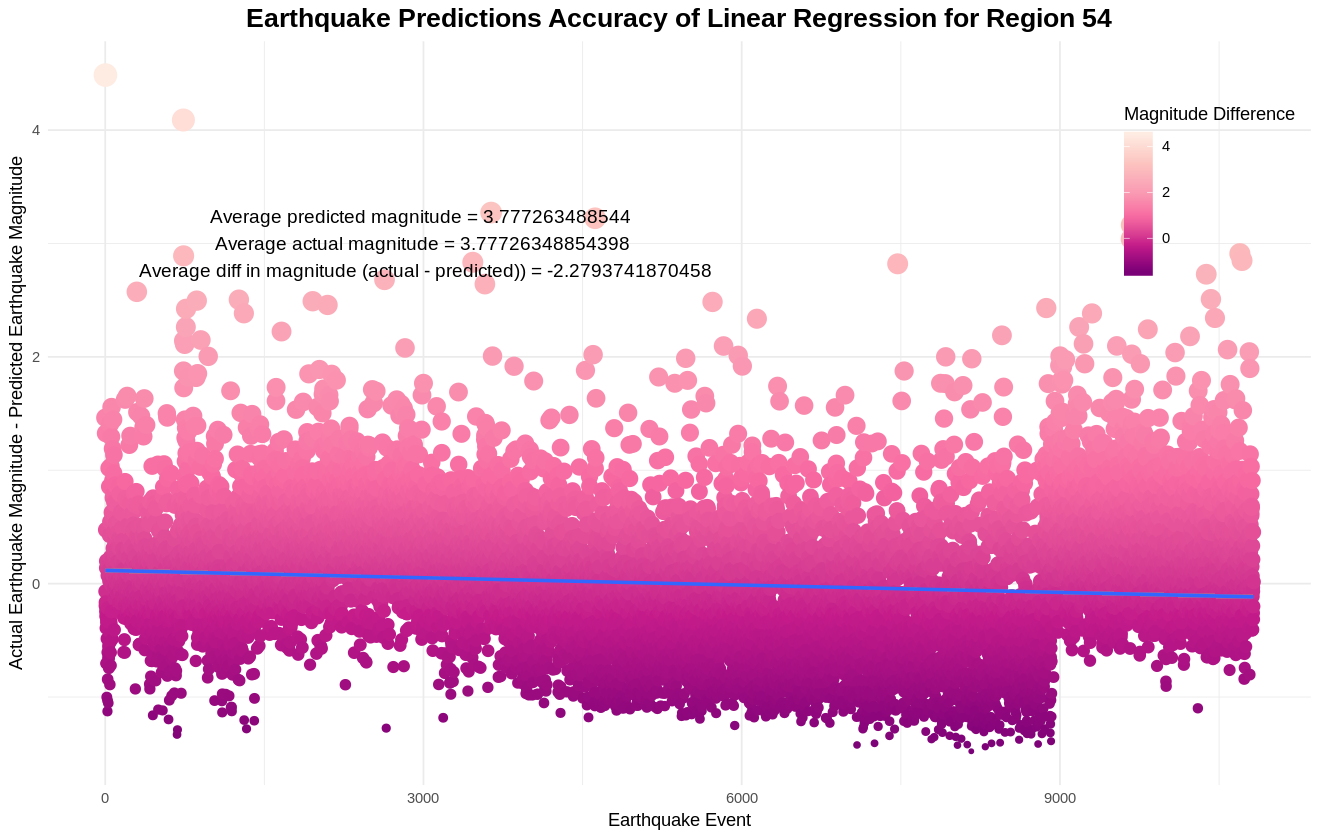

In [82]:
#Jessica 
options(repr.plot.width=11, repr.plot.height=7)#change size 
labels = c("Average predicted magnitude = 3.777263488544 \n Average actual magnitude = 3.77726348854398 \n Average diff in magnitude (actual - predicted)) = -2.2793741870458")
#add average values

ggplot(d3, aes(x = id, y = diff, color = diff, size = diff))+#add data
scale_color_distiller(palette = "RdPu") + #choise a pretty color scheme
theme_minimal()+ #make look nice
theme(legend.position = c(.92, .8))+ #move legend
geom_point()+#add points
#add trend line
geom_smooth(method = "lm")+
#get ride of size legend
guides(size = FALSE)+
annotate("text", x = 3000, y = 3, label = labels, size=4)+ #position text
#relabels
xlab("Earthquake Event") + 
labs(color = "Magnitude Difference")+
ylab("Actual Earthquake Magnitude - Predicted Earthquake Magnitude") +
ggtitle("Earthquake Predictions Accuracy of Linear Regression for Region 54") +
# I give a proper title

theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

# Data Cleanup

This section is dedicated to creating a new dataframe for the entire dataset with only variables necessary for linear regression. Afterwards the dataset will undergo linear regression. 

In [96]:
#Elysa 
#Creating an overall dataframe for linear regression with only necessary variables 
overallLDF = bvalue_df[c(3,4,6:8,12,13)]
head(overallLDF)

depth,mag,latitude,longitude,bvalue,time_Time,time_Year
87.5,2.5,63.1622,-149.6963,0.6433992,12:51:05,2002
10.0,3.3,54.3998,-160.7571,0.3158505,19:15:41,2002
44.9,2.5,59.9429,-149.7878,0.6113635,08:05:02,2002
7.7,3.1,63.2605,-151.3179,0.6433992,09:31:57,2002
16.6,3.1,55.4264,-158.4416,0.3158505,05:17:53,2002
13.2,3.7,60.2080,-139.4049,0.6300175,09:32:33,2002


# Linear Regression Analysis

After the overall data is cleaned up then the regression can begin. All variables will be used in this regression although  the results of the correlation tests showed that b-values did not add anything to the variable relationships. Time was not a huge contributor either but it has been decided to keep it in at this time. 

In [69]:
#Elysa 
#creating a formula for the overall data set
formula2 <- mag~.
m2 <- train(formula2, overallLDF, method = "lm")
summary(m2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6714 -0.4590 -0.0576  0.3916  5.0538 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.006e+01  3.226e-01  -31.196  < 2e-16 ***
depth        8.424e-04  9.509e-06   88.589  < 2e-16 ***
latitude    -9.447e-03  3.264e-05 -289.394  < 2e-16 ***
longitude    3.063e-03  8.029e-06  381.525  < 2e-16 ***
bvalue      -3.030e-01  3.143e-03  -96.411  < 2e-16 ***
time_Time   -2.419e-07  3.683e-08   -6.568 5.12e-11 ***
time_Year    7.076e-03  1.606e-04   44.070  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6508 on 506237 degrees of freedom
Multiple R-squared:  0.4312,	Adjusted R-squared:  0.4312 
F-statistic: 6.395e+04 on 6 and 506237 DF,  p-value: < 2.2e-16


# Creating the Visualization
After completing the regression a  visualization of the accuracy of the model will be created. 
This is done by comparing the actual magnitude values with the predicted magnitude values and recording their differences. The differences will then be graphed to display the accuracy visually. 

In [70]:
#Elysa 
#Checking to see what predicted values look like next to actual mag values 
coef.icept <- coef(m2$finalModel)[1] # define the intercept
coef.slope <- coef(m2$finalModel)[2] # define the slope
class_coefs <- coef(m2$finalModel)[2:8] # define adjusted slopes per class
overallLDF$pred<-predict(m2, newdata=overallLDF) # find the predicted values of the dataset mag
head(overallLDF)

depth,mag,latitude,longitude,bvalue,time_Time,time_Year,pred
87.5,2.5,63.1622,-149.6963,0.6433992,12:51:05,2002,2.915767
10.0,3.3,54.3998,-160.7571,0.3158505,19:15:41,2002,2.993055
44.9,2.5,59.9429,-149.7878,0.6113635,08:05:02,2002,2.923872
7.7,3.1,63.2605,-151.3179,0.6433992,09:31:57,2002,2.845538
16.6,3.1,55.4264,-158.4416,0.3158505,05:17:53,2002,3.008168
13.2,3.7,60.2080,-139.4049,0.6300175,09:32:33,2002,2.919546


In [71]:
#Elysa and Jessica 
dall = overallLDF[c(2,8)]
dall$id = seq.int(nrow(dall)) 
dall$diff = dall$mag - dall$pred
head(dall)

mag,pred,id,diff
2.5,2.915767,1,-0.41576737
3.3,2.993055,2,0.30694539
2.5,2.923872,3,-0.42387203
3.1,2.845538,4,0.25446151
3.1,3.008168,5,0.09183195
3.7,2.919546,6,0.78045424


In [72]:
#Elysa and Jessica 
#Finding average values for overall data set comparison to put on visualizations 
avgmagall = mean(dall$mag)
avgmagall
avgpredall = mean(dall$pred)
avgpredall
avgdiffall = mean(dall$diff)
avgdiffall

[1] 3.802068

[1] 3.802068

[1] -3.580937e-14

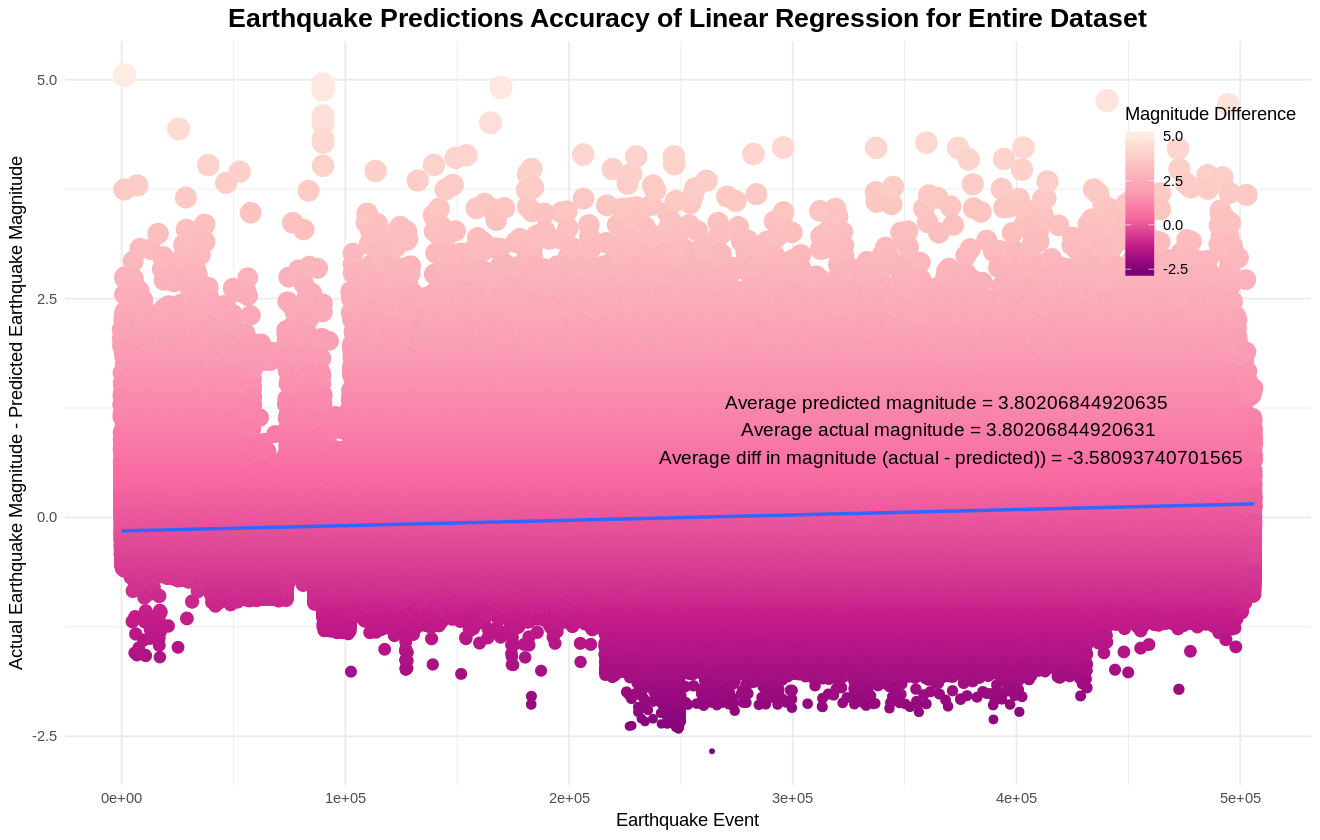

In [95]:
#Jessica 
options(repr.plot.width=11, repr.plot.height=7)#change size 
labels = c("Average predicted magnitude = 3.80206844920635 \n Average actual magnitude = 3.80206844920631 \n Average diff in magnitude (actual - predicted)) = -3.58093740701565")
#add average values

ggplot(dall, aes(x = id, y = diff, color = diff, size = diff))+#add data
scale_color_distiller(palette = "RdPu") + #choise a pretty color scheme
theme_minimal()+ #make look nice
theme(legend.position = c(.92, .8))+ #move legend
geom_point()+#add points
#add trend line
geom_smooth(method = "lm")+
#get ride of size legend
guides(size = FALSE)+
annotate("text", x = 370000, y = 1, label = labels, size=4)+ #position text
#relabels
xlab("Earthquake Event") + 
labs(color = "Magnitude Difference")+
ylab("Actual Earthquake Magnitude - Predicted Earthquake Magnitude") +
ggtitle("Earthquake Predictions Accuracy of Linear Regression for Entire Dataset") +
# I give a proper title

theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))

# Linear Regression Results 

After doing linear regression using depth, mag, latitude, longitude, bvalue, time_Time, and	time_Year for both Region 54, which was the region with the most normally distributed data set with the highest correlation between variables, and the overall data, the performance of each one can be seen. Both regressions were done to try and predict magnitude. The Region 54 linear regression had an R^2 value of 0.3224 while the overall data set had an R^2 value of 0.4312. By looking at the graphs it can be seen that both regressions displayed a large amount of variance between predicted and actual magnitude values. Both had trend lines that hovered around 0 while the Region 54 had a slight negative slope and the overall slope was slightly positive. Overall both examples of multiple linear regression did not perform that well and the addition of b-values did not seem to increase their accuracy which was suprising since the group thought the addition of a grouped variable may increase accuracy. 